<a href="https://colab.research.google.com/github/UmarJamal05/ML_Coursework/blob/main/Ahamed_Jamal_Umar_2330976_20221078.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "bank-full.csv"
df = pd.read_csv(file_path, sep=';')

# Inspection
print("First 5 rows of the dataset:")
print(df.head())

print("\nSummary of the dataset:")
print(df.info())

print("\nDescriptive statistics:")
print(df.describe())

print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 e

<ipython-input-2-33e0b2569e2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='viridis')


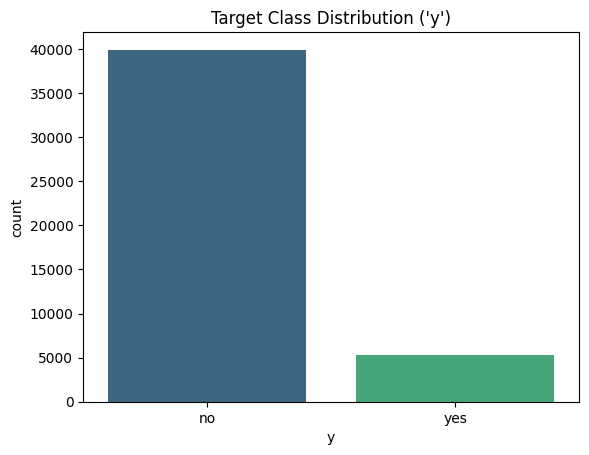

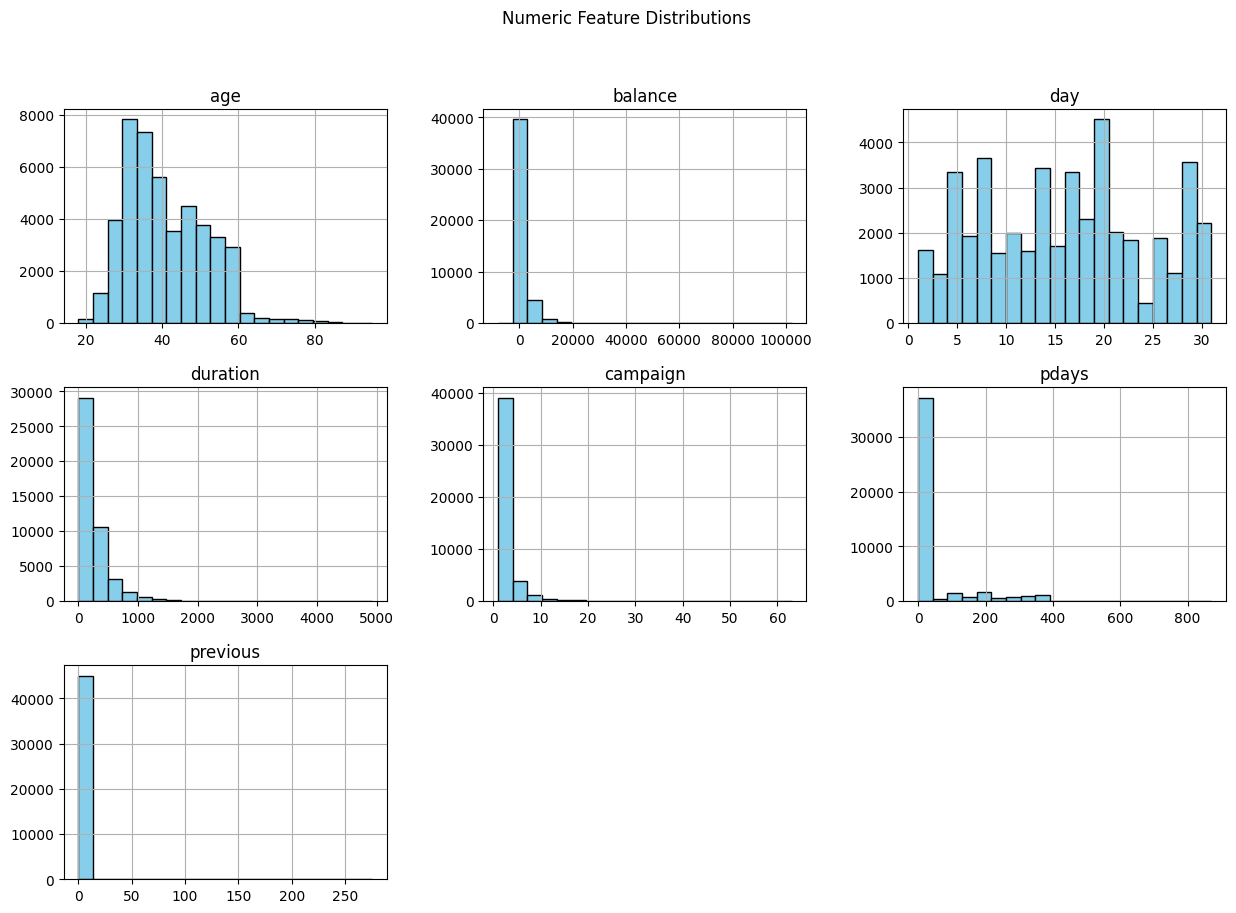

In [2]:
# Visualizing the target class distribution
sns.countplot(x='y', data=df, palette='viridis')
plt.title("Target Class Distribution ('y')")
plt.show()

# Visualizing numeric column distributions
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Numeric Feature Distributions")
plt.show()

# Cleaning process

Dataset after removing duplicates: (45211, 17)
'duration' column has been removed.


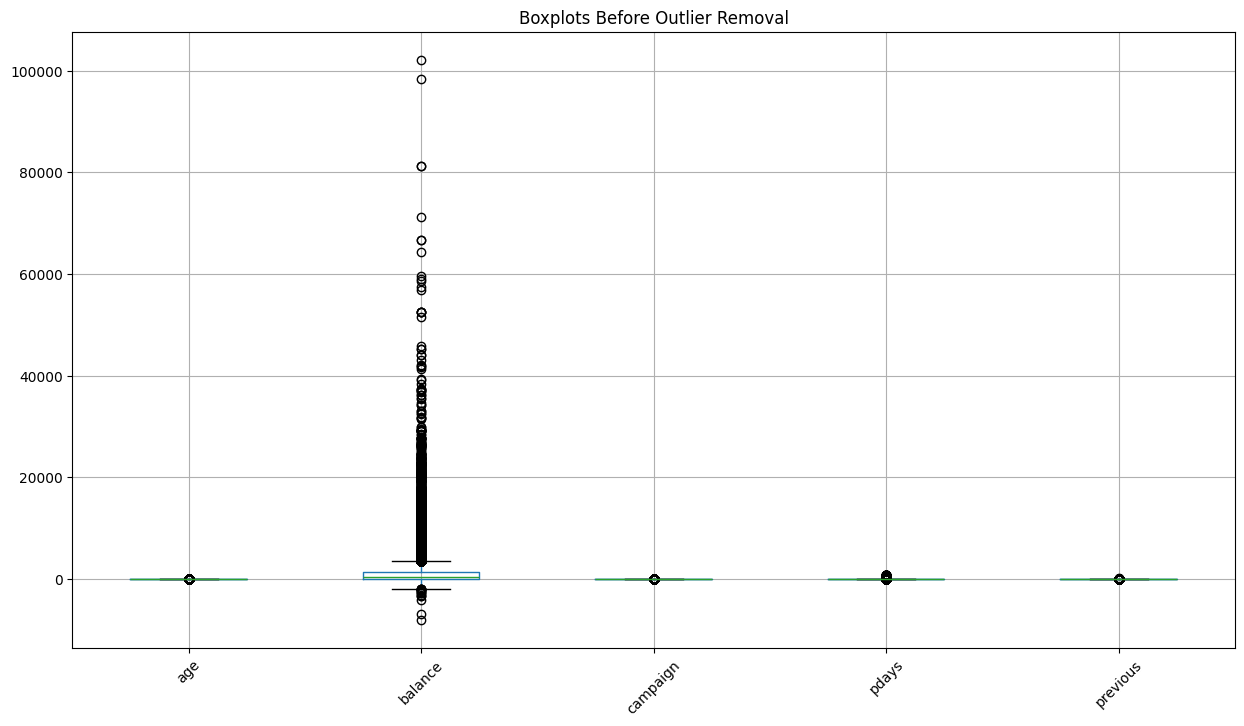

Column 'age':
  Q1 = 33.0, Q3 = 48.0, IQR = 15.0
  Lower bound = 10.5, Upper bound = 70.5
  Outliers below lower bound: 0
  Outliers above upper bound: 487
  Total outliers in 'age': 487
Column 'balance':
  Q1 = 71.0, Q3 = 1408.0, IQR = 1337.0
  Lower bound = -1934.5, Upper bound = 3413.5
  Outliers below lower bound: 19
  Outliers above upper bound: 4677
  Total outliers in 'balance': 4696
Column 'campaign':
  Q1 = 1.0, Q3 = 3.0, IQR = 2.0
  Lower bound = -2.0, Upper bound = 6.0
  Outliers below lower bound: 0
  Outliers above upper bound: 2748
  Total outliers in 'campaign': 2748
Column 'pdays':
  Q1 = -1.0, Q3 = -1.0, IQR = 0.0
  Lower bound = -1.0, Upper bound = -1.0
  Outliers below lower bound: 0
  Outliers above upper bound: 6930
  Total outliers in 'pdays': 6930
Column 'previous':
  Q1 = 0.0, Q3 = 0.0, IQR = 0.0
  Lower bound = 0.0, Upper bound = 0.0
  Outliers below lower bound: 0
  Outliers above upper bound: 0
  Total outliers in 'previous': 0

Outlier removal complete.
Numb

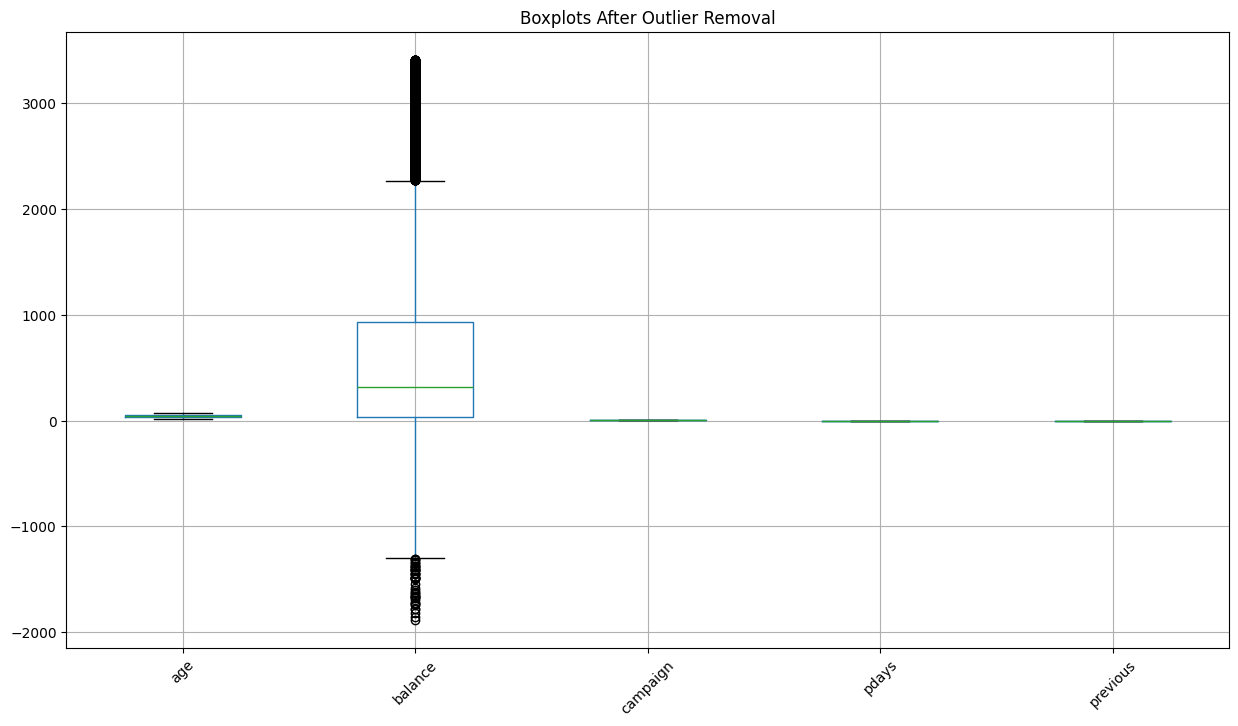

Cleaned dataset saved to cleaned_bank_full.csv


In [3]:
# Removing duplicates
df = df.drop_duplicates()
print(f"Dataset after removing duplicates: {df.shape}")

if 'duration' in df.columns:
    df = df.drop('duration', axis=1)
    print("'duration' column has been removed.")
else:
    print("'duration' column not found in the dataset.")

# Select numeric columns for outlier detection
numeric_cols = ['age', 'balance', 'campaign', 'pdays', 'previous']  # Specify relevant numeric columns

# Function to identify and remove outliers using IQR
def remove_outliers_iqr(df, columns):
    outlier_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_below = df[df[col] < lower_bound]
        outliers_above = df[df[col] > upper_bound]
        total_outliers = len(outliers_below) + len(outliers_above)
        outlier_count[col] = total_outliers

        print(f"Column '{col}':")
        print(f"  Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
        print(f"  Lower bound = {lower_bound}, Upper bound = {upper_bound}")
        print(f"  Outliers below lower bound: {len(outliers_below)}")
        print(f"  Outliers above upper bound: {len(outliers_above)}")
        print(f"  Total outliers in '{col}': {total_outliers}")

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    print("\nOutlier removal complete.")
    print(f"Number of rows remaining: {len(df)}")
    return df, outlier_count

# Identify and remove outliers
df_cleaned, outlier_summary = remove_outliers_iqr(df, numeric_cols)

# Save cleaned dataset
cleaned_file_path = "cleaned_bank_full.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation

In [ ]:
def transform_data(cleaned_file_path, transformed_file_path):
    # Load cleaned dataset
    df = pd.read_csv(cleaned_file_path)

    # Scale numerical features
    numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Save the transformed dataset
    df.to_csv(transformed_file_path, index=False)
    print(f"Transformed dataset saved to {transformed_file_path}")
    return df

transformed_file = "transformed_bank_full.csv"
df_transformed = transform_data("cleaned_bank_full.csv", transformed_file)

Transformed dataset saved to transformed_bank_full.csv
